In [1]:
#Importing the packages
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
data = pd.read_csv("labeled_data.csv")
#To preview the data
print(data. head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   
5           5      3            1                   2        0      1   
6           6      3            0                   3        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...  
6  !!!!!!"@__BrighterDays: I c

In [4]:
#converting multiclass to binary class as 0 for neither offensive and  1 for both hate and offensive
data["labels_binary"] = np.where(data["class"] != 2, 1, 0)


In [5]:
# Split data into features and labels
X = data["tweet"]
y = data["labels_binary"]

In [6]:
# Vectorize text data
cv=CountVectorizer()
X = cv.fit_transform(X)



In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Model building
model = DecisionTreeClassifier()

In [9]:
# Training the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Testing the model
y_probs = model.predict_proba(X_test)

In [11]:
# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

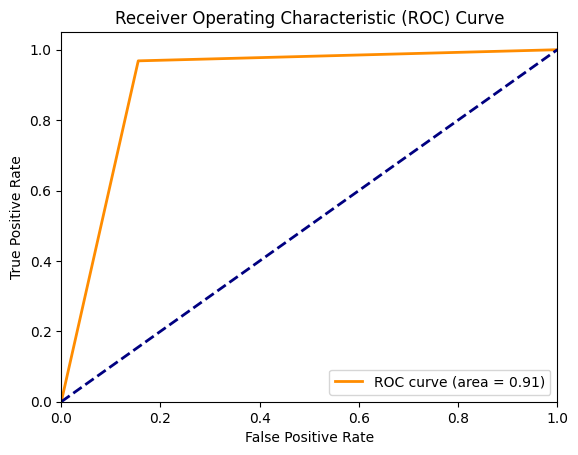

In [12]:
# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.calibration import calibration_curve

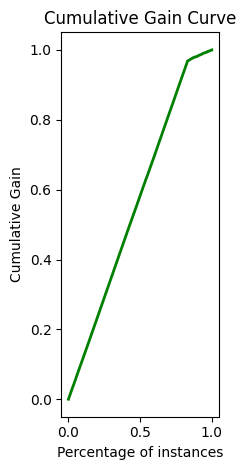

In [14]:
# Cumulative Gain Curve (Manual calculation)
sorted_indices = np.argsort(y_probs[:, 1])[::-1]
sorted_labels = y_test.iloc[sorted_indices]
cumulative_gains = np.cumsum(sorted_labels) / np.sum(y_test)
plt.subplot(1, 3, 3)
plt.plot(np.linspace(0, 1, len(cumulative_gains)), cumulative_gains, color='green', lw=2)
plt.xlabel('Percentage of instances')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Curve')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Lift Curve')

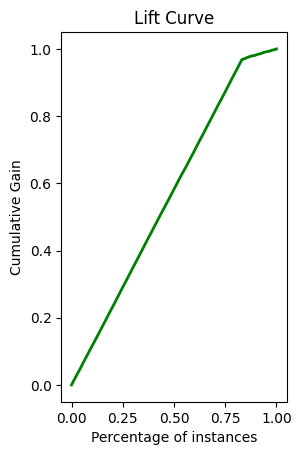

In [15]:
# Lift Curve
plt.subplot(1, 2, 1)
sorted_indices = np.argsort(y_probs[:, 1])[::-1]
sorted_labels = y_test.iloc[sorted_indices]
cumulative_gains = np.cumsum(sorted_labels) / np.sum(y_test)
plt.plot(np.linspace(0, 1, len(cumulative_gains)), cumulative_gains, color='green', lw=2)
plt.xlabel('Percentage of instances')
plt.ylabel('Cumulative Gain')
plt.title('Lift Curve')

NameError: name 'y_pred' is not defined

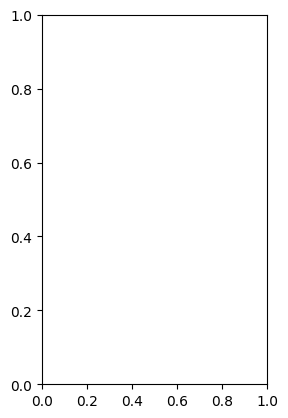

In [19]:
# Cost Curve (Example using hypothetical costs)
plt.subplot(1, 2, 2)
costs = [0, 1]  # Example costs for false negatives and false positives
false_negatives = np.sum(np.logical_and(y_test == 1, y_pred == 0))
false_positives = np.sum(np.logical_and(y_test == 0, y_pred == 1))
total_instances = len(y_test)
costs_at_thresholds = [(false_negatives * costs[0] + false_positives * costs[1]) / total_instances]
plt.plot(np.linspace(0, 1, 1), costs_at_thresholds, marker='o', color='blue', label='Cost curve')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Cost Curve')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# Assuming y_probs are the predicted probabilities and y_test are the true labels
precision, recall, _ = precision_recall_curve(y_test, y_probs[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Define costs
cost_fn = 1090
cost_fp = 50

# Calculate false negatives and false positives at different threshold levels
false_negatives = np.sum(np.logical_and(y_test == 1, y_pred == 0))
false_positives = np.sum(np.logical_and(y_test == 0, y_pred == 1))

# Calculate total instances
total_instances = len(y_test)

# Calculate expected cost at different threshold levels
costs_at_thresholds = [(false_negatives * cost_fn + false_positives * cost_fp) / total_instances]

# Plot Cost Curve
plt.figure()
plt.plot(np.linspace(0, 1, 1), costs_at_thresholds, marker='o', color='blue', label='Cost curve')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Cost Curve')
plt.legend(loc="upper right")
plt.show()


In [ ]:
from sklearn.metrics import f1_score
# Compute F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Plot F1 score
plt.figure()
plt.bar(["F1 Score"], [f1], color='skyblue')
plt.ylabel('Score')
plt.title('F1 Score')
plt.show()